# Animal Endangerment
### Simple investigation into endangered spieces
### By Andy Gao

#### Throughout the many years life has inhabited this earth, we've seen species come and go, like the dodo bird, which was declared extinct in 1690, and more recently, the western black rhino, which was declared extinct in 2011. My goal in this investigation is to find out how bad had the situation has gotten throughout recent years by using the dataset from https://www.iucnredlist.org/statistics

#### known as The International Union for Conservation of Nature Red List of Threatened Species is a organization located in the United Kingdom who is funded by the state. The purpose this organization was established was to tackle the issue of nature conservation and biodiversity. Having spread there operations overseas the parent organization has over 1000 members across the world studying and investigating the landscape and the species that inhabits them

#### By exacting and importing the data table into python i could use matplotlib to make useful graphs to assist me during this investigation, panda and numpy for some numerical information such as to find the ratio between total number of species in a class compared to the amount that is endangered in the species. These libraries in python helps in extracting information from large datasets and would greatly improve productiveness instead of spending time doing everything by hand.




## importing data into python
#### below is a block of code that imports all the libaraies we need for this investigation as well as importing the data from a .csv file and displaying it using the .head() method to comfrim that everything is in working order and ready for information gathering 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("IUCN Red List Changes - 2002 to 2022 - Single Measure (1).csv")
df.head()

,Year,Class,Metric,Number of Species
0,2002,Amphibians,Critically Endangered,30
1,2003,Amphibians,Critically Endangered,30
2,2004,Amphibians,Critically Endangered,413
3,2006,Amphibians,Critically Endangered,442
4,2007,Amphibians,Critically Endangered,441


## Comparison of Threatened species from the year 2002 and 2022. Which Class of spieces saw improvement or setback from 2002 to 2022?
#### the purpose of the following is to visualize the change in distrubtation of Threatened species to see if theres a change such as if one class of spieces saw a increase in the amount of Threatened species or a decrease. 


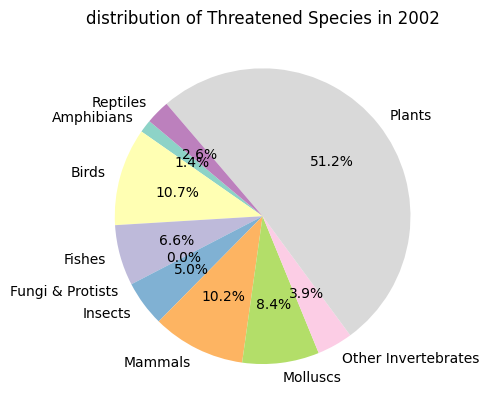

In [20]:
#filter year to 2002
filtered_df = df[(df['Metric'] == 'Total Threatened') & (df['Year'].isin([2002]))]

# Group by class and sum the number of species
grouped_df = filtered_df.groupby('Class')['Number of Species'].sum()

#building pie graph
plt.pie(grouped_df, labels=grouped_df.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)

plt.title('distribution of Threatened Species in 2002')
plt.show()

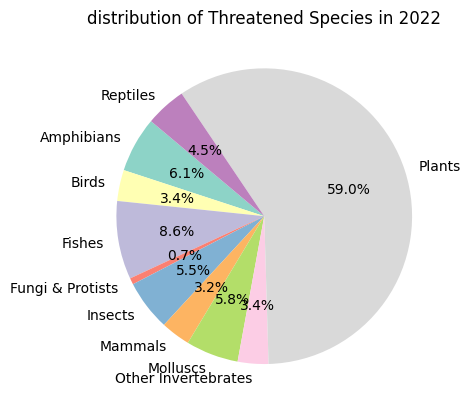

In [21]:
#filter year to 2022 and Total Threatened metric
filtered_df = df[(df['Metric'] == 'Total Threatened') & (df['Year'].isin([2022]))]

# Group by class and sum the number of species
grouped_df = filtered_df.groupby('Class')['Number of Species'].sum()

# building pie graph
plt.pie(grouped_df, labels=grouped_df.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)

plt.title('distribution of Threatened Species in 2022')
plt.show()

#### with these 2 pie charts we have generated we can see that the spieces class of Plants, reptiles, amphibians, fishes, fungi and protists, and insects saw a setback throughtout the years with the worst change being in the reptiles class seeing a whole +7.8% increase from 2002 to 2022 and insects with a miniscule change of only +0.5%
#### But on the other hand we can see that some classes of species did see an improvement with their distribution on the charts with birds, mammals, other invertebrates, and molluscs seeing improvements on their positions with birds reciving the best results with a 7.3% from their original position and other invertebrates seeing the least but noticeable change with -0.5% from their original position in 2002.

## Change in number of critically endangered/endangered species from 2002 - 2022, 
### Has there been and increase or decrease in the number of endangered species in a 20 year time period across all classes of species?

##### the following code takes the number of all risk levels of species across all the classes of spieces and compares the amount of spieces from 2002 to 2022

### Risk level: Critically Endangered

### 

In [22]:
#converting variable number of species to a numerical value
df['Number of Species'] = pd.to_numeric(df['Number of Species'], errors='coerce')

# amount of Critically Endangered species in 2022 and 2002 for each class of speices
Critically_Endangered_2022 = df[(df['Metric'] == 'Critically Endangered') & (df['Year'] == 2022)].groupby('Class')['Number of Species'].sum()
Critically_Endangered_2002 = df[(df['Metric'] == 'Critically Endangered') & (df['Year'] == 2002)].groupby('Class')['Number of Species'].sum()

# defining difference
difference = Critically_Endangered_2022 - Critically_Endangered_2002

#pivot table
pivot_table = pd.DataFrame({'Difference(Critically Endangered)': difference})

# print the pivot table
print(pivot_table)

                     Difference(Critically Endangered)
Class                                                 
Amphibians                                       651.0
Birds                                             49.0
Fishes                                           643.0
Fungi & Protists                                  36.0
Insects                                          366.0
Mammals                                           51.0
Molluscs                                         495.0
Other Invertebrates                              232.0
Plants                                          4186.0
Reptiles                                         378.0


#### with the critically endangered risk level we can see that across all classes of species the situation has gotten much wosrse for everyone. There was no negative change in the critically endangered risk level for all classes of species.All of them  saw a gain in the amount of critically endangered spieces which means things are not looking good especially for the plant kingdom seeing an increase of 4186 different species of plant being added more than all the other classes combined 

### Risk level: Endangered 

In [23]:
#converting variable number of species to a numerical value
df['Number of Species'] = pd.to_numeric(df['Number of Species'], errors='coerce')

# amount of Endangered species in 2022 and 2002 for each class of speices
endangered_2022 = df[(df['Metric'] == 'Endangered') & (df['Year'] == 2022)].groupby('Class')['Number of Species'].sum()
endangered_2002 = df[(df['Metric'] == 'Endangered') & (df['Year'] == 2002)].groupby('Class')['Number of Species'].sum()

# defining difference
difference = endangered_2022 - endangered_2002

#pivot table
pivot_table = pd.DataFrame({'Difference(Endangered)': difference})

# print the pivot table
print(pivot_table)

                     Difference(Endangered)
Class                                      
Amphibians                           1066.0
Birds                                  97.0
Fishes                               1072.0
Fungi & Protists                      102.0
Insects                               831.0
Mammals                               210.0
Molluscs                              363.0
Other Invertebrates                   294.0
Plants                               8705.0
Reptiles                              708.0


#### for the risk level of endangered we again see that the situation here is about the same as for the critically endangered table. All classes of species saw an increase in the amount of species added over a 20 year time period. with plants alone seeing and additional 8705 amount of species added that are endangered blowing pass all other classes making it the 2nd time we saw plants at the top spot

### Risk level: Vulnerable

In [24]:
#converting variable number of species to a numerical value
df['Number of Species'] = pd.to_numeric(df['Number of Species'], errors='coerce')

# amount of Vulnerable species in 2022 and 2002 for each class of speices
Vulnerable_2022 = df[(df['Metric'] == 'Vulnerable') & (df['Year'] == 2022)].groupby('Class')['Number of Species'].sum()
Vulnerable_2002 = df[(df['Metric'] == 'Vulnerable') & (df['Year'] == 2002)].groupby('Class')['Number of Species'].sum()

# defining difference
difference = Vulnerable_2022 - Vulnerable_2002

#pivot table
pivot_table = pd.DataFrame({'Difference(Vulnerable)': difference})

# print the pivot table
print(pivot_table)

                     Difference(Vulnerable)
Class                                      
Amphibians                            641.0
Birds                                  71.0
Fishes                               1091.0
Fungi & Protists                      152.0
Insects                               537.0
Mammals                               -61.0
Molluscs                              587.0
Other Invertebrates                   429.0
Plants                               5844.0
Reptiles                              466.0


#### again we can see that the plant kingdom is in 1st place in the Vulnerable risk level making it the class of species with the most Threatened class of species for the last 20 years. But one surprise caught my eye, there was a decrease in the amount of mammals added to the Vulnerable risk level and the only species class to see a decrease in the amount being added over the last 20 years and it's the only decrease we see across all the risk levels

## Ratio of total amount of species and total amount of thats been listed as threatened from 2002 and 2022,
### Which of the species classes has the highest and lowest ratios of their kingdom thats been placed in a risk level?

#### in the following i took the total amount of Threatened spieces documented from each species class and divided it by to total amount of Assessed species to get the percentage of speceies that are Threatened in each species class. i've decided to compare 2022 to 2003 because Fungi & Protists wasn't investgated in 2002 so the ratio would come back undefined 

In [53]:
#converting variable number of species to a numerical value
df['Number of Species'] = pd.to_numeric(df['Number of Species'].replace(',', '', regex=True))

# total number of Assessed species for each class in 2003
Assessed_2003 = df[(df['Metric'] == 'Total Assessed') & (df['Year'] == 2003)].groupby('Class')['Number of Species'].sum()

#total number of Threatened species for each class in 2003
Threatened_2003 = df[(df['Metric'] == 'Total Threatened') & (df['Year'] == 2003)].groupby('Class')['Number of Species'].sum()

# defining ratio
ratio = Threatened_2003 / Assessed_2003

#pivot table
pivot_table = pd.DataFrame({'ratio': ratio})

# print the pivot table
print(pivot_table)


                        ratio
Class                        
Amphibians           0.391521
Birds                0.558205
Fishes               0.489556
Fungi & Protists     1.000000
Insects              0.720052
Mammals              0.235957
Molluscs             0.460915
Other Invertebrates  0.850775
Plants               0.697919
Reptiles             0.619450


In [54]:
#converting variable number of species to a numerical value
df['Number of Species'] = pd.to_numeric(df['Number of Species'].replace(',', '', regex=True))

# total number of Assessed species for each class in 2022
Assessed_2022 = df[(df['Metric'] == 'Total Assessed') & (df['Year'] == 2022)].groupby('Class')['Number of Species'].sum()

# total number of Threatened species for each class in 2022
Threatened_2022 = df[(df['Metric'] == 'Total Threatened') & (df['Year'] == 2022)].groupby('Class')['Number of Species'].sum()

# defining ratio
ratio = Threatened_2022 / Assessed_2022

#pivot table
pivot_table = pd.DataFrame({'ratio': ratio})

# print the pivot table
print(pivot_table)



                        ratio
Class                        
Amphibians           0.343767
Birds                0.126232
Fishes               0.145673
Fungi & Protists     0.473856
Insects              0.188389
Mammals              0.223991
Molluscs             0.264389
Other Invertebrates  0.257450
Plants               0.398380
Reptiles             0.181773


#### i believe that it is unfair to assume the ratio for all fungi because not enough species of it was assessed during the early 2000s but we do see that as the years go by and more and more species was being documented that about 47.38% of all Fungi & Protists speices was in some kind of risk level.
#### but overall we can see that from 2003 the percentages of Threatened species was compared to the amount Assessed was significantly higher than the percentages found in 2022. 
#### there is only one theory i could come up with. As more and more spieces was added to to database the information became more refined and closer in representing the real amount and ratio. In situations like this it's diffcult to know if a spieces is actually extincted or endangered because of the lack funding for such information gathering. But as the years go on and digital media gets more widespread and more concern is placed on the topic we were able to uncover more information about the life that inhabits this earth

## Change of risk levels.
### we already know that there are 3 different types of risk levels but which one of them has the largest share of the overall Total Threatened from 2002, 2012 and 2022
#### the following code takes the amount of species from all 3 risk levels of critically endangered, endangered, and vulnerable and combines them into a total_threatened variable for a given year. and with that a 3 pie charts are made with the ratio of each risk level in total_threatened

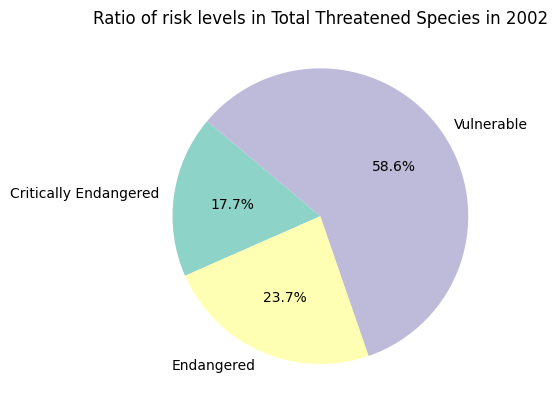

In [13]:
# converting Number of Species to a numeric value
df['Number of Species'] = pd.to_numeric(df['Number of Species'], errors='coerce')

# Filter data for the year 2002 and Total Threatened species
filtered_df = df[(df['Year'] == 2002) & (df['Metric'].isin(['Critically Endangered', 'Endangered', 'Vulnerable']))]

# Group by the Metric column and calculate the total number of species for each metric
total_threatened_by_metric = filtered_df.groupby('Metric')['Number of Species'].sum()

# Calculate the ratio
total_threatened_ratio = total_threatened_by_metric / total_threatened_by_metric.sum()

#pie chart
plt.pie(total_threatened_ratio, labels=total_threatened_ratio.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
plt.title('Ratio of risk levels in Total Threatened Species in 2002')
plt.show()


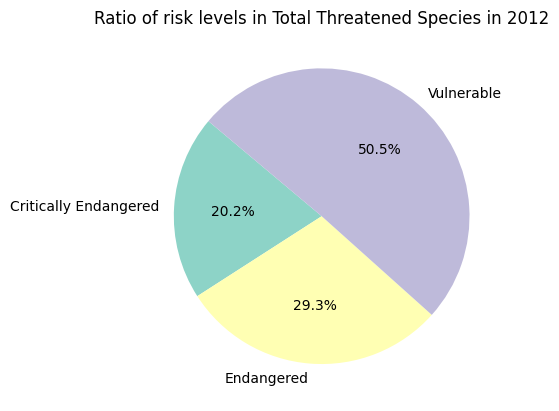

In [13]:
# converting Number of Species to a numeric value
df['Number of Species'] = pd.to_numeric(df['Number of Species'], errors='coerce')

# Filter data for the year 2012 and Total Threatened species
filtered_df = df[(df['Year'] == 2012) & (df['Metric'].isin(['Critically Endangered', 'Endangered', 'Vulnerable']))]

# Group by the Metric column and calculate the total number of species for each metric
total_threatened_by_metric = filtered_df.groupby('Metric')['Number of Species'].sum()

# Calculate the ratio
total_threatened_ratio = total_threatened_by_metric / total_threatened_by_metric.sum()

#pie chart
plt.pie(total_threatened_ratio, labels=total_threatened_ratio.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
plt.title('Ratio of risk levels in Total Threatened Species in 2012')
plt.show()


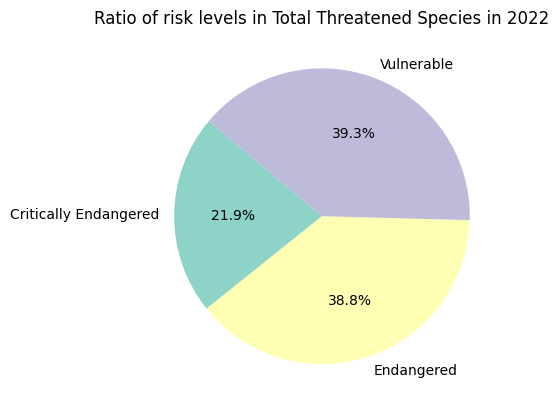

In [15]:
# converting Number of Species to a numeric value
df['Number of Species'] = pd.to_numeric(df['Number of Species'], errors='coerce')

# Filter data for the year 2022 and Total Threatened species
filtered_df = df[(df['Year'] == 2022) & (df['Metric'].isin(['Critically Endangered', 'Endangered', 'Vulnerable']))]

# Group by the Metric column and calculate the total number of species for each metric
total_threatened_by_metric = filtered_df.groupby('Metric')['Number of Species'].sum()

# Calculate the ratio
total_threatened_ratio = total_threatened_by_metric / total_threatened_by_metric.sum()

#pie chart
plt.pie(total_threatened_ratio, labels=total_threatened_ratio.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
plt.title('Ratio of risk levels in Total Threatened Species in 2022')
plt.show()


#### with these 3 pie charts we can see gather a few pieces of information.
#### 1. species labeled as critically endangered seem to be on the rise form 2002 to 2012 and 2012 to 2022
#### 2. species labeled as endangered seem to be on the rise form 2002 to 2012 and 2012 to 2022
#### 3. species labeled as vulnerable seem to be on the decline form 2002 to 2012 and 2012 to 2022
#### with the information I can come up with 2 ideas of what's going on ,either more and more spieces are bring labeled as critically endangered or endangered, or more species are being taken off the vulnerable amount. either way the information still sticks and that something is causing the ratio of critically endangered and endangered to rise which in turn in very concerning.

## change of totals(Threatened and Assessed)
### how has the total amount of Threatened and Assessed change throught out the years for all species?
#### in the following code chunks i compared the total number of species assessed and total number of species threatened for all species class on a line graph to see if there was a correleation between the two over time

### Mammals

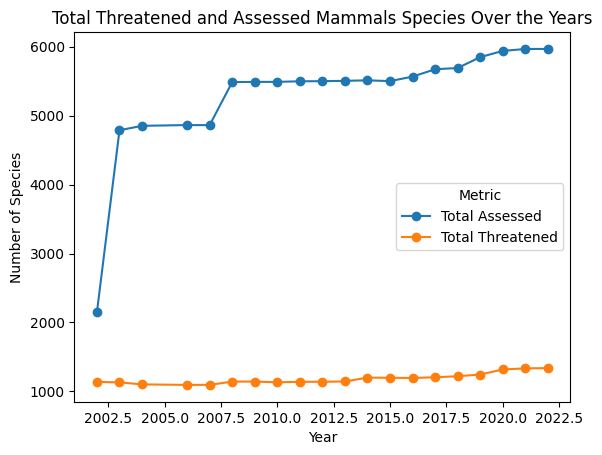

In [55]:
# Convert 'Number of Species' column to numeric
df['Number of Species'] = pd.to_numeric(df['Number of Species'].replace(',', '', regex=True))

# Filter data 
filtered_df = df[(df['Class'] == 'Mammals') & (df['Metric'].isin(['Total Threatened', 'Total Assessed']))]

# calculation of total number of species for each year and metric
total_species_by_year = filtered_df.groupby(['Year', 'Metric'])['Number of Species'].sum().unstack()


# Plot a line chart
total_species_by_year.plot(kind='line', marker='o')
plt.title('Total Threatened and Assessed Mammals Species Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Species')
plt.legend(title='Metric')
plt.show()

#### with this graph we can see that from 2002 to 2003 there was a spike in mammals assessed to be in the wild but the number of mammals Threatened stays around the same range while the total amount of mammels assessed has more of a dramatic increase thoughout the years

### Amphibians

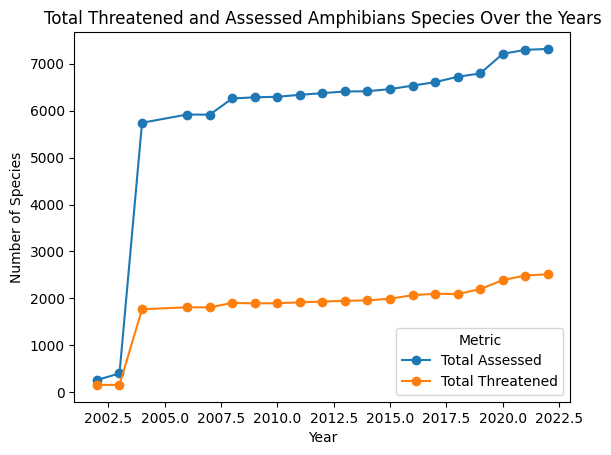

In [56]:
# Convert 'Number of Species' column to numeric
df['Number of Species'] = pd.to_numeric(df['Number of Species'].replace(',', '', regex=True))

# Filter data 
filtered_df = df[(df['Class'] == 'Amphibians') & (df['Metric'].isin(['Total Threatened', 'Total Assessed']))]

# calculation of total number of species for each year and metric
total_species_by_year = filtered_df.groupby(['Year', 'Metric'])['Number of Species'].sum().unstack()


# Plot a line chart
total_species_by_year.plot(kind='line', marker='o')
plt.title('Total Threatened and Assessed Amphibians Species Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Species')
plt.legend(title='Metric')
plt.show()

#### when we see the splike from 2003 to 2004 both amounts of total threatended and assessed both had a sharpe increase and it seems like the correlation between threatended and assessed are similar to eachother thoughout the years

### Birds

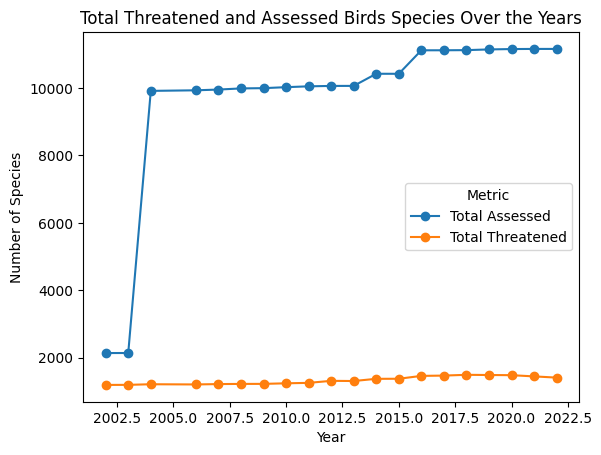

In [57]:
# Convert 'Number of Species' column to numeric
df['Number of Species'] = pd.to_numeric(df['Number of Species'].replace(',', '', regex=True))

# Filter data 
filtered_df = df[(df['Class'] == 'Birds') & (df['Metric'].isin(['Total Threatened', 'Total Assessed']))]

# calculation of total number of species for each year and metric
total_species_by_year = filtered_df.groupby(['Year', 'Metric'])['Number of Species'].sum().unstack()


# Plot a line chart
total_species_by_year.plot(kind='line', marker='o')
plt.title('Total Threatened and Assessed Birds Species Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Species')
plt.legend(title='Metric')
plt.show()

#### it seems that the spike in assessed birds from 2003 to 2004 didnt really effect the amount of threatended birds and the trend seems to keep up with only minor increases in threatedned total after 20 years

### Fishes

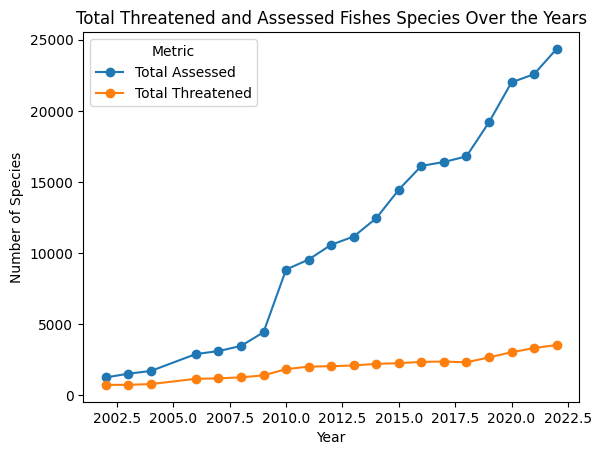

In [58]:
# Convert 'Number of Species' column to numeric
df['Number of Species'] = pd.to_numeric(df['Number of Species'].replace(',', '', regex=True))

# Filter data 
filtered_df = df[(df['Class'] == 'Fishes') & (df['Metric'].isin(['Total Threatened', 'Total Assessed']))]

# calculation of total number of species for each year and metric
total_species_by_year = filtered_df.groupby(['Year', 'Metric'])['Number of Species'].sum().unstack()


# Plot a line chart
total_species_by_year.plot(kind='line', marker='o')
plt.title('Total Threatened and Assessed Fishes Species Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Species')
plt.legend(title='Metric')
plt.show()

#### we see that the number of assessed fish had a consistent amount of growth throughout the years and not just a huge spike. we can also see that the gap between the total amount of assessed and threatended is getting wider and wider as the years go on which means that the ratio is getting smaller

### Fungi & Protists

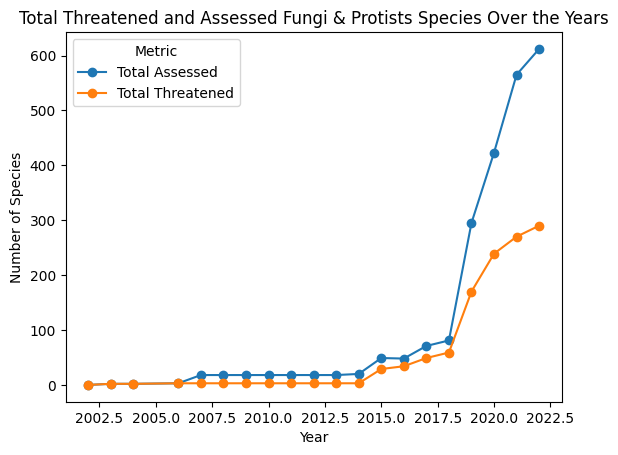

In [59]:
# Convert 'Number of Species' column to numeric
df['Number of Species'] = pd.to_numeric(df['Number of Species'].replace(',', '', regex=True))

# Filter data 
filtered_df = df[(df['Class'] == 'Fungi & Protists') & (df['Metric'].isin(['Total Threatened', 'Total Assessed']))]

# calculation of total number of species for each year and metric
total_species_by_year = filtered_df.groupby(['Year', 'Metric'])['Number of Species'].sum().unstack()


# Plot a line chart
total_species_by_year.plot(kind='line', marker='o')
plt.title('Total Threatened and Assessed Fungi & Protists Species Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Species')
plt.legend(title='Metric')
plt.show()

#### we see that not much attention was given to the Fungi & Protists Species until 2019 where the amount of assessed Fungi & Protists Species shot up and it still continues to 2022 but the same can also be said for the amount of threated Fungi & Protists Species also follows the same pattern

### Insects

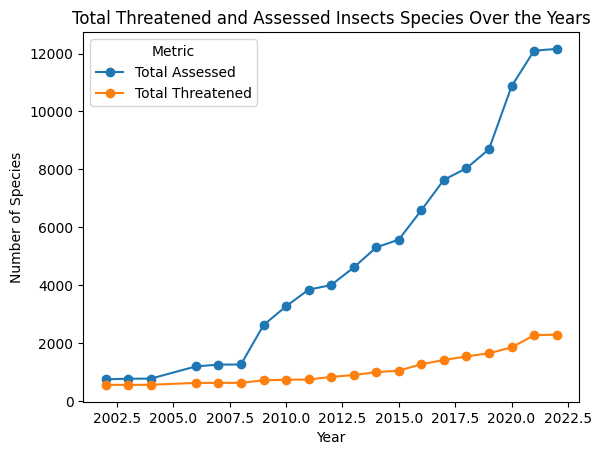

In [60]:
# Convert 'Number of Species' column to numeric
df['Number of Species'] = pd.to_numeric(df['Number of Species'].replace(',', '', regex=True))

# Filter data 
filtered_df = df[(df['Class'] == 'Insects') & (df['Metric'].isin(['Total Threatened', 'Total Assessed']))]

# calculation of total number of species for each year and metric
total_species_by_year = filtered_df.groupby(['Year', 'Metric'])['Number of Species'].sum().unstack()


# Plot a line chart
total_species_by_year.plot(kind='line', marker='o')
plt.title('Total Threatened and Assessed Insects Species Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Species')
plt.legend(title='Metric')
plt.show()

#### in this graph we can see that from 2008 onwards more and more spieces was being assessed each year and the gap between the assessed line and the threatened lines seems to get larger and larger after 2008 as well

### Molluscs

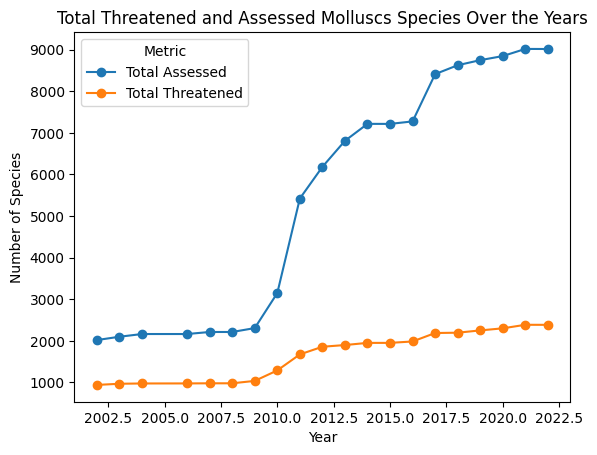

In [61]:
# Convert 'Number of Species' column to numeric
df['Number of Species'] = pd.to_numeric(df['Number of Species'].replace(',', '', regex=True))

# Filter data 
filtered_df = df[(df['Class'] == 'Molluscs') & (df['Metric'].isin(['Total Threatened', 'Total Assessed']))]

# calculation of total number of species for each year and metric
total_species_by_year = filtered_df.groupby(['Year', 'Metric'])['Number of Species'].sum().unstack()


# Plot a line chart
total_species_by_year.plot(kind='line', marker='o')
plt.title('Total Threatened and Assessed Molluscs Species Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Species')
plt.legend(title='Metric')
plt.show()

#### we can see that after 2009 the amount of assessed Molluscs saw a dramatic increase as well as after 2016 too and we can also see some growth in the amount of threatened Molluscs species but it isnt as dramatic of a change in after 2016 as from 2009 - 2011

### Other Invertebrates

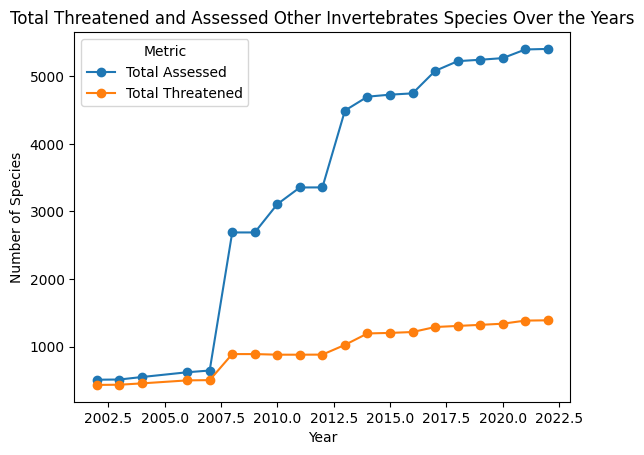

In [62]:
# Convert 'Number of Species' column to numeric
df['Number of Species'] = pd.to_numeric(df['Number of Species'].replace(',', '', regex=True))

# Filter data 
filtered_df = df[(df['Class'] == 'Other Invertebrates') & (df['Metric'].isin(['Total Threatened', 'Total Assessed']))]

# calculation of total number of species for each year and metric
total_species_by_year = filtered_df.groupby(['Year', 'Metric'])['Number of Species'].sum().unstack()


# Plot a line chart
total_species_by_year.plot(kind='line', marker='o')
plt.title('Total Threatened and Assessed Other Invertebrates Species Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Species')
plt.legend(title='Metric')
plt.show()

#### here we can see the amount of assessed Invertebrates had 2 spikes, one from 2008 and one in 2013 we can also see that during those same years the amounts of threated Invertebrates also saw a noticeable increase but not as dramatic as the ones being assessed

### Plants

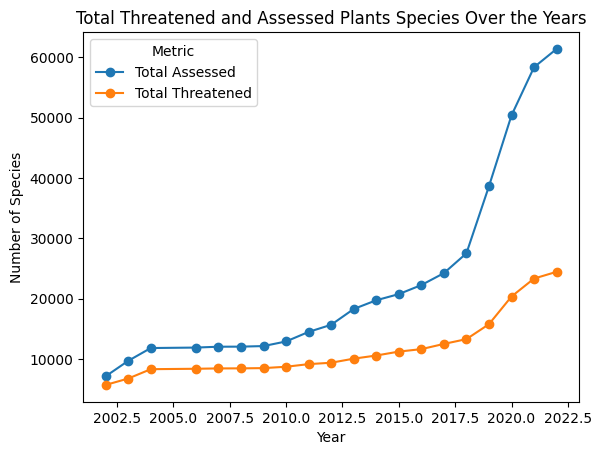

In [63]:
# Convert 'Number of Species' column to numeric
df['Number of Species'] = pd.to_numeric(df['Number of Species'].replace(',', '', regex=True))

# Filter data 
filtered_df = df[(df['Class'] == 'Plants') & (df['Metric'].isin(['Total Threatened', 'Total Assessed']))]

# calculation of total number of species for each year and metric
total_species_by_year = filtered_df.groupby(['Year', 'Metric'])['Number of Species'].sum().unstack()


# Plot a line chart
total_species_by_year.plot(kind='line', marker='o')
plt.title('Total Threatened and Assessed Plants Species Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Species')
plt.legend(title='Metric')
plt.show()

#### here we can see that the amount of assessed plants has also been consistent over the years until after 2018 wher it had a big spike and the amount of threatened plants also seems to go up but it cant keep up with the amount assessed

### Reptiles

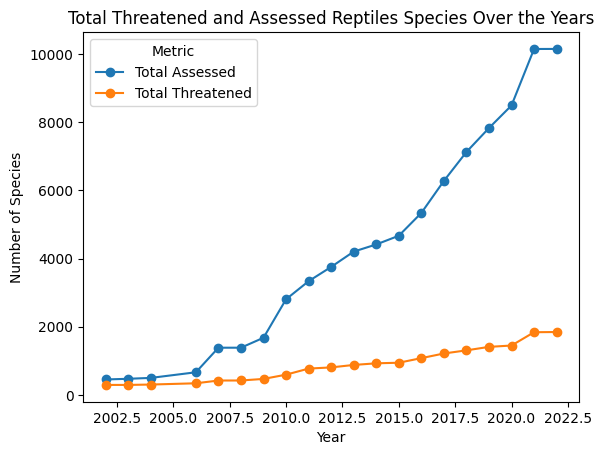

In [64]:
# Convert 'Number of Species' column to numeric
df['Number of Species'] = pd.to_numeric(df['Number of Species'].replace(',', '', regex=True))

# Filter data 
filtered_df = df[(df['Class'] == 'Reptiles') & (df['Metric'].isin(['Total Threatened', 'Total Assessed']))]

# calculation of total number of species for each year and metric
total_species_by_year = filtered_df.groupby(['Year', 'Metric'])['Number of Species'].sum().unstack()


# Plot a line chart
total_species_by_year.plot(kind='line', marker='o')
plt.title('Total Threatened and Assessed Reptiles Species Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Species')
plt.legend(title='Metric')
plt.show()

#### here we can see that the amount of assessed reptiles has increase every year expect from 2007 to 2008 we can also see that the total amount of threatened reptiles slowly increases as well after each passing year most of the time

#### as we can see from the graphs that as more and more species from each species class were being assessed the gap between it and the threatened line became wider and wider meaning that the ratio of threatened amount and the assessed amount is get smaller and smaller. as we saw in a previous question of ratios 

## Risk level rankings
### which species class has the highest ratio in each risk level in 2016, 2018, 2020, and 2022?  would there be a change in rankings in recent years?

### 2022

In [15]:
# Convert 'Number of Species' column to numeric
df['Number of Species'] = pd.to_numeric(df['Number of Species'], errors='coerce')

# Filter data
filtered_df = df[(df['Year'] == 2022) & (df['Metric'].isin(['Critically Endangered', 'Endangered', 'Vulnerable']))]

# Pivot table 
pivot_table = pd.pivot_table(filtered_df, values='Number of Species', index='Class', columns='Metric', aggfunc='sum', fill_value=0)

#ratio calculation
pivot_table_ratio = pivot_table.div(pivot_table.sum(axis=1), axis=0)

# Find the class with the highest and lowest ratio for each risk level
highest_ratio_class = pivot_table_ratio.idxmax(axis=0)
lowest_ratio_class = pivot_table_ratio.idxmin(axis=0)

# Display the pivot table with the highest ratio class for each risk level
print("Pivot table with the highest ratio class for each risk level in 2022:")
print(pivot_table_ratio)
print("\nClass with the highest ratio for each risk level in 2022:")
print(highest_ratio_class)
print("\nClass with the lowest ratio for each risk level in 2022:")
print(lowest_ratio_class )

Pivot table with the highest ratio class for each risk level in 2022:
Metric               Critically Endangered  Endangered  Vulnerable
Class                                                             
Amphibians                        0.270775    0.438569    0.290656
Birds                             0.163946    0.300213    0.535841
Fishes                            0.225479    0.342446    0.432074
Fungi & Protists                  0.124138    0.351724    0.524138
Insects                           0.179834    0.414230    0.405936
Mammals                           0.173523    0.410621    0.415856
Molluscs                          0.300755    0.251258    0.447987
Other Invertebrates               0.209202    0.266715    0.524083
Plants                            0.213996    0.408851    0.377152
Reptiles                          0.234688    0.426558    0.338753

Class with the highest ratio for each risk level in 2022:
Metric
Critically Endangered      Molluscs
Endangered              

#### in 2022 we can see that Molluscs ranks 1st in the Critically Endangered, Amphibians ranks 1st in the Endangered, and Birds ranks 1st in the Vulnerable in species class with the highest ratio of the 3 different risk levels
#### we can also see that Fungi & Protists ranks 1st in the Critically Endangered, Molluscs ranks 1st in the Endangered, and Amphibians ranks 1st in the Vulnerable in species class with the lowest ratio of the 3 different risk levels

### 2019

In [19]:
# Convert 'Number of Species' column to numeric
df['Number of Species'] = pd.to_numeric(df['Number of Species'], errors='coerce')

# Filter data
filtered_df = df[(df['Year'] == 2019) & (df['Metric'].isin(['Critically Endangered', 'Endangered', 'Vulnerable']))]

# Pivot table 
pivot_table = pd.pivot_table(filtered_df, values='Number of Species', index='Class', columns='Metric', aggfunc='sum', fill_value=0)

#ratio calculation
pivot_table_ratio = pivot_table.div(pivot_table.sum(axis=1), axis=0)

# Find the class with the highest and lowest ratio for each risk level
highest_ratio_class = pivot_table_ratio.idxmax(axis=0)
lowest_ratio_class = pivot_table_ratio.idxmin(axis=0)

# Display the pivot table with the highest ratio class for each risk level
print("Pivot table with the highest ratio class for each risk level in 2019:")
print(pivot_table_ratio)
print("\nClass with the highest ratio for each risk level in 2019:")
print(highest_ratio_class)
print("\nClass with the lowest ratio for each risk level in 2019:")
print(lowest_ratio_class )

Pivot table with the highest ratio class for each risk level in 2019:
Metric               Critically Endangered  Endangered  Vulnerable
Class                                                             
Amphibians                        0.267273    0.438182    0.294545
Birds                             0.151413    0.310229    0.538358
Fishes                            0.221391    0.324607    0.454001
Fungi & Protists                  0.111765    0.352941    0.535294
Insects                           0.188828    0.346691    0.464481
Mammals                           0.163183    0.405949    0.430868
Molluscs                          0.296444    0.250667    0.452889
Other Invertebrates               0.203927    0.259819    0.536254
Plants                            0.204704    0.363066    0.432230
Reptiles                          0.219304    0.400994    0.379702

Class with the highest ratio for each risk level in 2019:
Metric
Critically Endangered      Molluscs
Endangered              

#### in 2019 we can see that Molluscs ranks 1st in the Critically Endangered, Amphibians ranks 1st in the Endangered, and Birds ranks 1st in the Vulnerable in species class with the highest ratio of the 3 different risk levels
#### we can also see that Fungi & Protists ranks 1st in the Critically Endangered, Molluscs ranks 1st in the Endangered, and Amphibians ranks 1st in the Vulnerable in species class with the lowest ratio of the 3 different risk levels

### 2016

In [20]:
# Convert 'Number of Species' column to numeric
df['Number of Species'] = pd.to_numeric(df['Number of Species'], errors='coerce')

# Filter data
filtered_df = df[(df['Year'] == 2016) & (df['Metric'].isin(['Critically Endangered', 'Endangered', 'Vulnerable']))]

# Pivot table 
pivot_table = pd.pivot_table(filtered_df, values='Number of Species', index='Class', columns='Metric', aggfunc='sum', fill_value=0)

#ratio calculation
pivot_table_ratio = pivot_table.div(pivot_table.sum(axis=1), axis=0)

# Find the class with the highest and lowest ratio for each risk level
highest_ratio_class = pivot_table_ratio.idxmax(axis=0)
lowest_ratio_class = pivot_table_ratio.idxmin(axis=0)

# Display the pivot table with the highest ratio class for each risk level
print("Pivot table with the highest ratio class for each risk level in 2016:")
print(pivot_table_ratio)
print("\nClass with the highest ratio for each risk level in 2016:")
print(highest_ratio_class)
print("\nClass with the lowest ratio for each risk level in 2016:")
print(lowest_ratio_class )

Pivot table with the highest ratio class for each risk level in 2016:
Metric               Critically Endangered  Endangered  Vulnerable
Class                                                             
Amphibians                        0.264023    0.411992    0.323985
Birds                             0.154110    0.306849    0.539041
Fishes                            0.195422    0.279780    0.524799
Fungi & Protists                  0.235294    0.352941    0.411765
Insects                           0.178233    0.321767    0.500000
Mammals                           0.170854    0.388610    0.440536
Molluscs                          0.295363    0.258569    0.446069
Other Invertebrates               0.173235    0.256158    0.570608
Plants                            0.215237    0.317015    0.467749
Reptiles                          0.219648    0.390176    0.390176

Class with the highest ratio for each risk level in 2016:
Metric
Critically Endangered               Molluscs
Endangered     

#### in 2016 we can see that Molluscs ranks 1st in the Critically Endangered, Amphibians ranks 1st in the Endangered, and Other Invertebrates ranks 1st in the Vulnerable in species class with the highest ratio of the 3 different risk levels
#### we can also see that Birds ranks 1st in the Critically Endangered, Other Invertebrates ranks 1st in the Endangered, and Amphibians ranks 1st in the Vulnerable in species class with the lowest ratio of the 3 different risk levels

### 2013

In [21]:
# Convert 'Number of Species' column to numeric
df['Number of Species'] = pd.to_numeric(df['Number of Species'], errors='coerce')

# Filter data
filtered_df = df[(df['Year'] == 2013) & (df['Metric'].isin(['Critically Endangered', 'Endangered', 'Vulnerable']))]

# Pivot table 
pivot_table = pd.pivot_table(filtered_df, values='Number of Species', index='Class', columns='Metric', aggfunc='sum', fill_value=0)

#ratio calculation
pivot_table_ratio = pivot_table.div(pivot_table.sum(axis=1), axis=0)

# Find the class with the highest and lowest ratio for each risk level
highest_ratio_class = pivot_table_ratio.idxmax(axis=0)
lowest_ratio_class = pivot_table_ratio.idxmin(axis=0)

# Display the pivot table with the highest ratio class for each risk level
print("Pivot table with the highest ratio class for each risk level in 2013:")
print(pivot_table_ratio)
print("\nClass with the highest ratio for each risk level in 2013:")
print(highest_ratio_class)
print("\nClass with the lowest ratio for each risk level in 2013:")
print(lowest_ratio_class )

Pivot table with the highest ratio class for each risk level in 2013:
Metric               Critically Endangered  Endangered  Vulnerable
Class                                                             
Amphibians                        0.266667    0.401538    0.331795
Birds                             0.151376    0.303517    0.545107
Fishes                            0.195735    0.251185    0.553081
Fungi & Protists                  0.666667    0.333333    0.000000
Insects                           0.139509    0.275670    0.584821
Mammals                           0.171479    0.391076    0.437445
Molluscs                          0.291359    0.256059    0.452582
Other Invertebrates               0.149805    0.217899    0.632296
Plants                            0.194436    0.298957    0.506607
Reptiles                          0.186576    0.374289    0.439135

Class with the highest ratio for each risk level in 2013:
Metric
Critically Endangered       Fungi & Protists
Endangered     

#### in 2013 we can see that Fungi & Protists ranks 1st in the Critically Endangered, Amphibians ranks 1st in the Endangered, and Other Invertebrates ranks 1st in the Vulnerable in species class with the highest ratio of the 3 differnt risk levels
#### we can also see that Insects ranks 1st in the Critically Endangered, Other Invertebrates ranks 1st in the Endangered, and ungi & Protists ranks 1st in the Vulnerable in species class with the lowest ratio of the 3 different risk levels

#### from the tables above we can see that Molluscs species ranks on top of species with the highest ratio of Critically Endangered over the last 9 years taking the top spot for 2022, 2019, and 2016 but we can also see that Molluscs also appears in the lowest ratios for other risk levels such as endangered in 2019 and we can say the same for other cases as well wher it shows up in both the highest and lowest ratios of different risk factors. I think the cause of this is that the ratio of critcally endangered for molluscs is so high that it brings down the ratio for the other risk levels enough for it to make it on to the lowest risk level ratios table. Due to this i can assume it's the same for other species classes and risk levels

## conclusion
#### from the information gathered during this investigation i can confidently make some statements based on what i've found
#### 1. more species classes saw an percentage incrase in the distribution of Threatened Species and a decrase
#### 2. more and more species are entering the more severe risk levels such as critcally endangered or endangered and due to this the ratio of species in the Vulnerable risk level which is less severe saw a decrase
#### 3. as more and more species are being assessed and added to the data set the ratio of threatened species began to decrease
#### 4. although some species class ranks the highest in one risk level it could also rank the lowest in another

## Other reasources/datasets
### ourworldindata
#### Known as Our World in Data or OWID, it is an organization located in Oxford, England, which is in the United Kingdom. The purpose of the organization is to address various global issues such as poverty, climate change, disease, war, etc. One of these global issues is the endangerment of the species that inhabit this earth. It is accredited by the number of yearly users, reaching millions, and is cited not only in this project but also in many different research papers as well as various news media. It obtains its data by collecting it from government sources such as the United Nations, WHO, departments of health from many different countries, etc
#### https://ourworldindata.org/biodiversity
